In [1]:
%matplotlib inline

# APDLMath Sparse Matrices and SciPy Sparse Matrices

This tutorial will show how to get APDLMath sparse matrices (typically
stiffness or mass matrices extracted from APDL .Full Files) into SciPy
Sparse Matrices.


In [2]:
import matplotlib.pylab as plt

from ansys.mapdl.core.examples import vmfiles
import ansys.math.core.math as amath

# Start Ansys Math
mm = amath.Math()

Load and solve verification manual example 153. Then load the stiffness
matrix into APDLmath.


In [3]:
out = mm._mapdl.input(vmfiles["vm153"])
k = mm.stiff(fname="PRSMEMB.full")
k

Sparse APDLMath Matrix (126, 126)

Copy this APDLMath Sparse Matrix to a SciPy CSR matrix and plot the
graph of the sparse matrix


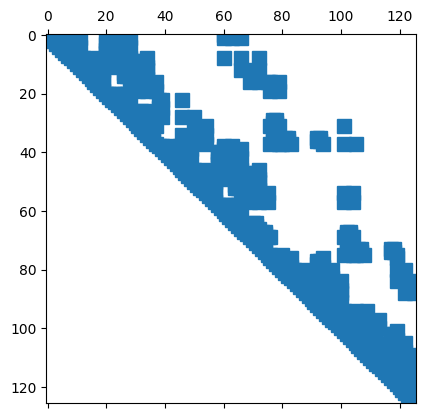

In [4]:
pk = k.asarray()
plt.spy(pk)

You can access the 3 vectors that describe this sparse matrix with.

-   `pk.data`
-   `pk.indices`
-   `pk.indptr`

See the `scipy` documentation of the csr matrix at
[scipy.sparse.csr_matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html)
for additional details.


In [5]:
print(pk.data[:10])
print(pk.indices[:10])
print(pk.indptr[:10])

[ 0.57249304  0.56369167 -0.28624652 -0.28184583 -0.24789676 -0.24408565
 -0.14312326 -0.14092292  0.77576289 -0.37033122]
[ 0  1  4  7 22 25 60 63  1  4]
[ 0  8 19 31 42 49 55 60 63 73]


\### Create a APDLMath Sparse Matrix from a SciPy Sparse CSR Matrix

Here, we transfer the `scipy` CSR matrix back to MAPDL. While this
example uses a matrix that was originally within MAPDL, you can load any
CSR matrix to MAPDL.


In [6]:
my_mat = mm.matrix(pk, "my_mat", triu=True)
my_mat

Sparse APDLMath Matrix (126, 126)

Check initial matrix `k` and `my_mat` are exactly the sames: We compute
the norm of the difference, should be zero


In [7]:
msub = k - my_mat
mm.norm(msub)

0.0

# CSR Representation in MAPDL

Printing the list of objects in the MAPDL space, we find:

-   2 SMAT objects, corresponding to the `k`, `MSub` matrices,
-   with encrypted names
-   The `my_mat` SMAT object. Its size is zero, because the 3
-   vectors are stored separately
-   the 3 vectors of the CSR my_mat structure: `MY_MAT_PTR`,
    `MY_MAT_IND`
-   and `MY_MAT_DATA`


In [8]:
mm.status()

APDLMATH PARAMETER STATUS-  (      6 PARAMETERS DEFINED)

  Name                   Type            Mem. (MB)       Dims            Workspace

   MY_MAT                SMAT            0.000           [126:126]               1
   NOEHXO                SMAT            0.011           [126:126]               1
   XRUCNT                SMAT            0.011           [126:126]               1
   MY_MAT_DATA           VEC             0.006           738             1
   MY_MAT_IND            VEC             0.001           127             1
   MY_MAT_PTR            VEC             0.003           738             1


# MAPDL Python Matrix Correspondence

To determine which MAPDL object corresponds to which Python object,
access the id property of the Python object.


In [9]:
print("name(k)=" + k.id)
print("name(my_mat)=" + my_mat.id)
print("name(msub)=" + msub.id)

name(k)=NOEHXO
name(my_mat)=my_mat
name(msub)=XRUCNT


stop mapdl


In [11]:
mm._mapdl.exit()